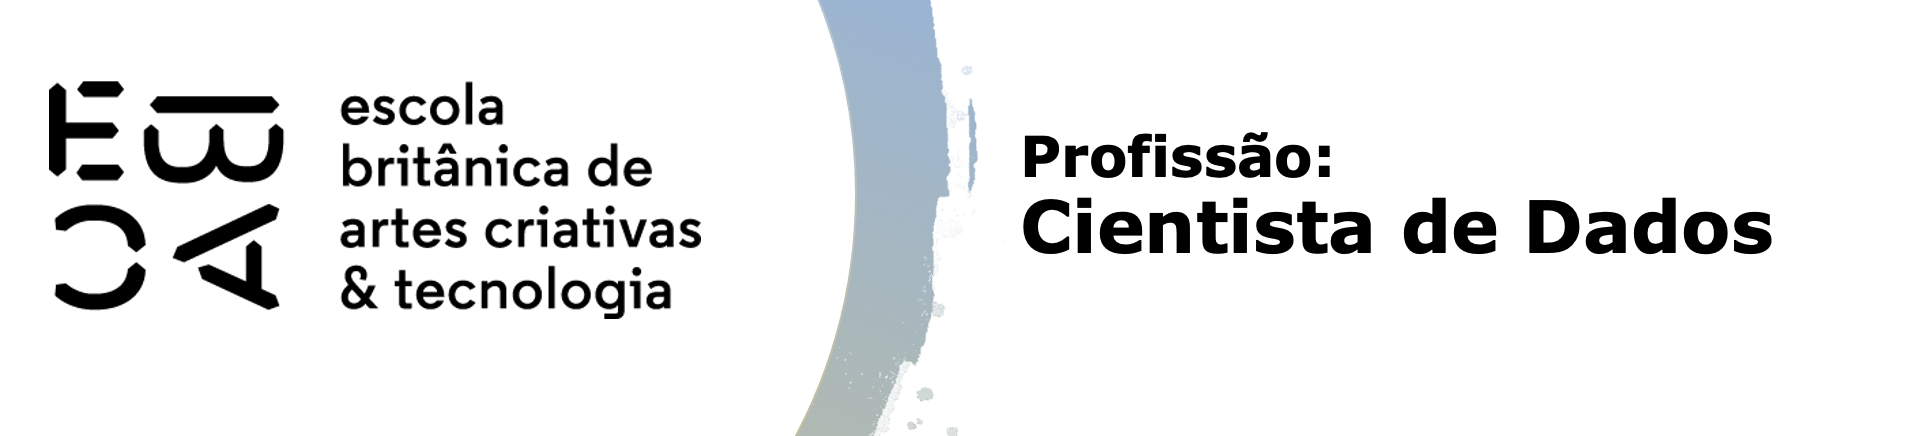
# Módulo 22 - Descritiva III - Gráficos interativos

# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 0. Carregamento dos pacotes necessários
Os pacotes utilizados nesta atividade são:
- plotly.express, para a produção de gráficos de linhas;
- objeto graph_objects do pacote plotly, para a construção do gráfico de candlestick;
- objeto Layout do pacote plotly.graph_objs, para regular as cores do gráfico de candlestick;
- pandas, para a montagem e análise de tabelas;
- numpy, para operações matemáticas com listas.

In [116]:
import plotly.express as px
from plotly import graph_objects
from plotly.graph_objs import Layout
import pandas as pd
import numpy as np

#### 1. Carregue os dados da tarefa anterior

Na tarefa anterior, foram usados os dados dos ativos NFLIX, AMZN e META, com todos eles salvos no arquivo 'ativos.csv'. Vamos carregar esta tabela, identificando-a com o nome 'df'.

In [117]:
# Cria um dataframe a partir da leitura do aquivo 'ativos.csv'
df = pd.read_csv('ativos.csv')

In [118]:
# Mostra as 5 primeiras linhas do dataframe
df.head()

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,NaN,AMZN,META,NFLX,AMZN,META,NFLX,AMZN,META,NFLX,AMZN,META,NFLX,AMZN,META,NFLX,AMZN,META,NFLX
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,76.95649719238281,135.67999267578125,267.6600036621094,76.95649719238281,135.67999267578125,267.6600036621094,77.66799926757812,137.50999450683594,269.75,73.04650115966797,128.55999755859375,256.5799865722656,73.26000213623047,128.99000549316406,259.2799987792969,159662000,28146200,11679500
3,2019-01-03,75.01399993896484,131.74000549316406,271.20001220703125,75.01399993896484,131.74000549316406,271.20001220703125,76.9000015258789,137.1699981689453,275.7900085449219,74.85549926757812,131.1199951171875,264.42999267578125,76.00050354003906,134.69000244140625,270.20001220703125,139512000,22717900,14969600
4,2019-01-04,78.76950073242188,137.9499969482422,297.57000732421875,78.76950073242188,137.9499969482422,297.57000732421875,79.69999694824219,138.0,297.79998779296875,75.91549682617188,133.75,278.5400085449219,76.5,134.00999450683594,281.8800048828125,183652000,29002100,19330100


Os nomes das colunas precisam ser corrigidas, além de remover as duas primeiras linhas do dataframe. Para isso, vamos usar o comando zip visto em aula.

In [119]:
# Repete 3 vezes o nome de cada coluna da tabela
colunas = 3*['Adj Close'] + 3*['Close'] + 3*['High'] + 3*['Low'] + 3*['Open'] + 3*['Volume'] 

# Repete 6 vezes os nomes dos ativos, para que tenha uma coluna para cada um deles
ativos = 6*['AMZN', 'META', 'NFLX']

# Junta as colunas com os nomes dos ativos, além de incluir a variável 'Date' 
nomes_colunas = ['Date'] + list(zip(colunas, ativos))

# Mostra os nomes das colunas criadas
nomes_colunas

['Date',
 ('Adj Close', 'AMZN'),
 ('Adj Close', 'META'),
 ('Adj Close', 'NFLX'),
 ('Close', 'AMZN'),
 ('Close', 'META'),
 ('Close', 'NFLX'),
 ('High', 'AMZN'),
 ('High', 'META'),
 ('High', 'NFLX'),
 ('Low', 'AMZN'),
 ('Low', 'META'),
 ('Low', 'NFLX'),
 ('Open', 'AMZN'),
 ('Open', 'META'),
 ('Open', 'NFLX'),
 ('Volume', 'AMZN'),
 ('Volume', 'META'),
 ('Volume', 'NFLX')]

In [120]:
# Remove as duas primeiras linhas com valores nulos
df.drop([0,1], inplace=True)

In [121]:
# Nomeia as colunas com os conjuntos definidos anteriormente
df.columns = nomes_colunas

# Toma a coluna 'Date' como índice da tabela
df.set_index('Date', inplace=True)

# Mostra o dataframe resultante
df.head()

,"(Adj Close, AMZN)","(Adj Close, META)","(Adj Close, NFLX)","(Close, AMZN)","(Close, META)","(Close, NFLX)","(High, AMZN)","(High, META)","(High, NFLX)","(Low, AMZN)","(Low, META)","(Low, NFLX)","(Open, AMZN)","(Open, META)","(Open, NFLX)","(Volume, AMZN)","(Volume, META)","(Volume, NFLX)"
Date,,,,,,,,,,,,,,,,,,
2019-01-02,76.95649719238281,135.67999267578125,267.6600036621094,76.95649719238281,135.67999267578125,267.6600036621094,77.66799926757812,137.50999450683594,269.75,73.04650115966797,128.55999755859375,256.5799865722656,73.26000213623047,128.99000549316406,259.2799987792969,159662000,28146200,11679500
2019-01-03,75.01399993896484,131.74000549316406,271.20001220703125,75.01399993896484,131.74000549316406,271.20001220703125,76.9000015258789,137.1699981689453,275.7900085449219,74.85549926757812,131.1199951171875,264.42999267578125,76.00050354003906,134.69000244140625,270.20001220703125,139512000,22717900,14969600
2019-01-04,78.76950073242188,137.9499969482422,297.57000732421875,78.76950073242188,137.9499969482422,297.57000732421875,79.69999694824219,138.0,297.79998779296875,75.91549682617188,133.75,278.5400085449219,76.5,134.00999450683594,281.8800048828125,183652000,29002100,19330100
2019-01-07,81.47550201416016,138.0500030517578,315.3399963378906,81.47550201416016,138.0500030517578,315.3399963378906,81.72799682617188,138.8699951171875,316.79998779296875,79.45950317382812,135.91000366210938,301.6499938964844,80.1155014038086,137.55999755859375,302.1000061035156,159864000,20089300,18620100
2019-01-08,82.8290023803711,142.52999877929688,320.2699890136719,82.8290023803711,142.52999877929688,320.2699890136719,83.83049774169922,143.13999938964844,320.5899963378906,80.83049774169922,139.5399932861328,308.010009765625,83.2344970703125,139.88999938964844,319.9800109863281,177628000,26263800,15359200


Apesar da tabela estar semelhante à original da tarefa anterior, não é possível selecionar um conjunto de colunas a partir da categoria em questão. Isto pode ser visto na próxima cédula, na qual tenta-se selecionar os fechamentos diários de cada ativo.

In [124]:
# Tenta mostrar os valores de fechamento de cada ativo
try:
    df['Adj Close']
except Exception as error:
    print('Não há coluna', error, 'na tabela.')

Não há coluna 'Adj Close' na tabela.


Para corrigir este problema, vamos utilizar o comando MultiIndex do pandas. Neste comando, precisamos de uma lista composta de duas listas, um com o nome da operação do ativo ('Adj Close', 'Close', etc.) e a outra com os nomes dos ativos.

In [81]:
# Lista com os nomes das operações e dos ativos 
colunas = [['Adj Close','Close','High','Low','Open','Volume'], ['AMZN', 'META', 'NFLX']]

Agora, vamos determinar os nomes das colunas da tabela a partir do produto entre as listas. O resultado deste produto será aplicado ao comando MultiIndex, definido as variáveis.

In [82]:
# Determina as colunas da tabela, submetendo o produto entre as lista ao comando MultiIndex
df.columns = pd.MultiIndex.from_product(colunas)

# Mostra a tabela resultante
df

Adj Close                                          \
                          AMZN                META                NFLX   
Date                                                                     
2019-01-02   76.95649719238281  135.67999267578125   267.6600036621094   
2019-01-03   75.01399993896484  131.74000549316406  271.20001220703125   
2019-01-04   78.76950073242188   137.9499969482422  297.57000732421875   
2019-01-07   81.47550201416016   138.0500030517578   315.3399963378906   
2019-01-08    82.8290023803711  142.52999877929688   320.2699890136719   
...                        ...                 ...                 ...   
2023-11-27  147.72999572753906  334.70001220703125   479.1700134277344   
2023-11-28  147.02999877929688    338.989990234375               479.0   
2023-11-29  146.32000732421875  332.20001220703125  477.19000244140625   
2023-11-30  146.08999633789062   327.1499938964844   473.9700012207031   
2023-12-01  147.02999877929688  324.82000732421875    465.739990234375   

                         Close                                          \
                          AMZN                META                NFLX   
Date                                                                     
2019-01-02   76.95649719238281  135.67999267578125   267.6600036621094   
2019-01-03   75.01399993896484  131.74000549316406  271.20001220703125   
2019-01-04   78.76950073242188   137.9499969482422  297.57000732421875   
2019-01-07   81.47550201416016   138.0500030517578   315.3399963378906   
2019-01-08    82.8290023803711  142.52999877929688   320.2699890136719   
...                        ...                 ...                 ...   
2023-11-27  147.72999572753906  334.70001220703125   479.1700134277344   
2023-11-28  147.02999877929688    338.989990234375               479.0   
2023-11-29  146.32000732421875  332.20001220703125  477.19000244140625   
2023-11-30  146.08999633789062   327.1499938964844   473.9700012207031   
2023-12-01  147.02999877929688  324.82000732421875    465.739990234375   

                          High                                          \
                          AMZN                META                NFLX   
Date                                                                     
2019-01-02   77.66799926757812  137.50999450683594              269.75   
2019-01-03    76.9000015258789   137.1699981689453   275.7900085449219   
2019-01-04   79.69999694824219               138.0  297.79998779296875   
2019-01-07   81.72799682617188   138.8699951171875  316.79998779296875   
2019-01-08   83.83049774169922  143.13999938964844   320.5899963378906   
...                        ...                 ...                 ...   
2023-11-27  149.25999450683594   339.8999938964844               482.0   
2023-11-28  147.60000610351562   339.3800048828125               480.5   
2023-11-29   148.5399932861328   339.8999938964844    480.989990234375   
2023-11-30  146.92999267578125               333.5   478.5899963378906   
2023-12-01              147.25   326.8599853515625   475.2300109863281   

                           Low                                          \
                          AMZN                META                NFLX   
Date                                                                     
2019-01-02   73.04650115966797  128.55999755859375   256.5799865722656   
2019-01-03   74.85549926757812   131.1199951171875  264.42999267578125   
2019-01-04   75.91549682617188              133.75   278.5400085449219   
2019-01-07   79.45950317382812  135.91000366210938   301.6499938964844   
2019-01-08   80.83049774169922   139.5399932861328    308.010009765625   
...                        ...                 ...                 ...   
2023-11-27   146.8800048828125  334.20001220703125   475.3500061035156   
2023-11-28  145.52999877929688   333.3999938964844  475.95001220703125   
2023-11-29  145.97000122070312   330.7799987792969    474.489990234375   
2023-11-30   144.33000

Vemos que a tabela apresenta 1239 linhas, 18 colunas e está pronta para análise, uma vez que ela está igual à original.

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

Sejam 'AdjC' a tabela só com os valores de fechamentos ajustados dos ativos, e 'AdjC90_mean' a tabela com a média móvel em 90 dias deles.

In [83]:
# Cria a tabela com os valores de fechamento ajustados
AdjC = df['Adj Close'].copy

# Mostra as 5 primeiras linhas da tabela
AdjC.head()

,AMZN,META,NFLX
Date,,,
2019-01-02,76.95649719238281,135.67999267578125,267.6600036621094
2019-01-03,75.01399993896484,131.74000549316406,271.20001220703125
2019-01-04,78.76950073242188,137.9499969482422,297.57000732421875
2019-01-07,81.47550201416016,138.0500030517578,315.3399963378906
2019-01-08,82.8290023803711,142.52999877929688,320.2699890136719


In [84]:
# Cria a tabela com as médias móveis em 90 dias
AdjC90_mean = AdjC.rolling(90).mean()

# Mostra as 5 primeiras linhas da tabela
AdjC90_mean

,AMZN,META,NFLX
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN
...,...,...,...
2023-11-27,134.787445,308.808445,416.382666
2023-11-28,134.976667,309.305445,416.954889
2023-11-29,135.171334,309.756445,417.497333


Vamos agora obter o desvio padrão móvel desses ativos. Seja AdjC90_std a tabela com os valores de desvio padrão.

In [91]:
# Cria uma tabela com os valores de desvio padrão móvel
AdjC90_std = AdjC.rolling(90).std()

# Mostra a tabela
AdjC90_std

,AMZN,META,NFLX
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN
...,...,...,...
2023-11-27,6.560664,14.218785,30.852123
2023-11-28,6.665781,14.483819,31.530764
2023-11-29,6.738797,14.558381,32.143342


Utilizando a tabela com as médias móveis, montemos um gráfico de linhas. Antes de qualquer coisa, vamos verticalizar esta tabela, fazendo uma coluna só com os nomes dos ativos. Ela será chamada de mean_vertical.

In [93]:
# Cria uma tabela com os nomes dos ativos em uma coluna e remove os valores nulos
mean_vertical = AdjC90_mean.stack().reset_index()

# Renomeia as colunas da tabela
mean_vertical.columns = ['Data', 'Ativo', 'Média']

# Mostra a tabela
mean_vertical

,Data,Ativo,Média
0,2019-05-10,AMZN,86.705022
1,2019-05-10,META,166.929110
2,2019-05-10,NFLX,353.511667
3,2019-05-13,AMZN,86.862550
4,2019-05-13,META,167.438666
...,...,...,...
3445,2023-11-30,META,310.119556
3446,2023-11-30,NFLX,418.011444
3447,2023-12-01,AMZN,135.569556
3448,2023-12-01,META,310.411223


In [96]:
# Cria o gráfico de linhas com as médias móveis em função do tempo
medias = px.line(mean_vertical, x="Data", y="Média", color='Ativo', template='plotly_white')

# Mostra o gráfico de linhas
medias.show()

Vamos agora repetir o processo do gráfico de linhas, mas para o desvio padrão.

In [97]:
# Cria uma tabela com os nomes dos ativos em uma coluna e remove os valores nulos
std_vertical = AdjC90_std.stack().reset_index()

# Renomeia as colunas da tabela
std_vertical.columns = ['Data', 'Ativo', 'Desvio Padrão']

# Mostra a tabela
std_vertical

,Data,Ativo,Desvio Padrão
0,2019-05-10,AMZN,5.843562
1,2019-05-10,META,15.337159
2,2019-05-10,NFLX,20.566136
3,2019-05-13,AMZN,5.768426
4,2019-05-13,META,15.046346
...,...,...,...
3445,2023-11-30,META,14.580358
3446,2023-11-30,NFLX,32.674009
3447,2023-12-01,AMZN,6.870708
3448,2023-12-01,META,14.609249


In [99]:
# Cria o gráfico de linhas com os desvios padrão em função do tempo
desvios = px.line(std_vertical, x="Data", y="Desvio Padrão", color='Ativo', template='plotly_white')

# Mostra o gráfico de linhas
desvios.show()

O gráfico de médias móveis está parcialmente de acordo com o gráfico da tarefa anterior, uma vez que o ativo mais valorizado foi o NFLX, enquanto que o mais desvalorizado foi o AMZN. Por outro lado, é esperado que nos períodos nas quais houveram maiores amplitudes também houvessem maiores devios padrão na média móvel. Isso não é visualizado integralmente, uma vez que nos períodos nas quais as amplitudes dos ativos foram mais altas, não ocorreu o mesmo com seu desvio padrão. Por exemplo, a maior amplitude do NFLX ocorreu entre Julho de 2020 e Janeiro de 2021. No mesmo período vemos um pico no desvio padrão que logo cai e fica quase estável até meados de Julho de 2021. Além disso, entre Janeiro e Julho de 2022, vemos um maior desvio padrão do mesmo ativo, mas com amplitudes menores do que as presentes no período citado anteriormente. 

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

Dado que o ativo mais valorizado foi o NFLX, vamos tomá-lo para análise neste exercício. Para isto, tomemos as colunas da tabela original (df) relacionadas a apenas ele.

In [110]:
# Lista com os nomes dos indicadores
indicadores = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Cria uma lista com o mesmo comprimento da anterior só com o ativo NFLX
ativo = ['NFLX']*len(indicadores)

# Une as duas listas em uma única
colunas_ref = list(zip(indicadores, ativo))

Utilizando a lista criada na última célula, vamos tomar os dados deste ativo nos últimos 60 dias corridos. Lembrando que o df tem os dados até o dia 04/12/2023, seja a data inicial 04/10/2023.

In [111]:
# Toma os dados do ativo nos últimos 60 dias corridos
nflx = df.loc['2023-10-04':, colunas_ref]

# Renomeia as colunas da tabela
nflx.columns = indicadores

# Mostra as 5 primeiras linhas
nflx.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-10-04,376.8999938964844,376.8999938964844,380.2200012207031,373.5799865722656,376.5,4303700
2023-10-05,372.5899963378906,372.5899963378906,378.6000061035156,367.239990234375,378.010009765625,5034800
2023-10-06,381.510009765625,381.510009765625,382.5199890136719,367.7699890136719,368.42999267578125,4773400
2023-10-09,385.95001220703125,385.95001220703125,387.1700134277344,377.760009765625,378.04998779296875,3299800
2023-10-10,373.32000732421875,373.32000732421875,388.70001220703125,372.25,385.5799865722656,7288900


Agora que os dados foram seáparados, vamos criar o gráfico de _candlestick_. Para construí-lo, precisamos de um dicionário com os parâmetros deste gráfico, sendo estes:

- x: o valor que deve entrar no eixo x
- open: o valor de abertura do ativo
- close: o valor de fechamento do ativo
- high: o valor máximo
- low: o valor mínimo
- type: o tipo de gráfico que vai ser um *candlestick*
- name: o nome do ativo que vai aparecer na legenda
- showlegend: um parâmetro estético que define se deve ou não mostrar a legenda

In [112]:
# Dicionário com os parâmetros do gráfico
parametros = {
    'x': nflx.index,
    'open': nflx.Open,
    'close': nflx.Close,
    'high': nflx.High,
    'low': nflx.Low,
    'type': 'candlestick',
    'name': 'NFLX',
    'showlegend': True
}

Agora que os parâmetros foram especificados, vamos montar o gráfico.

In [114]:
# Define o layout do gráfico
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

# Insere os dados no gráfico
grafico = graph_objects.Figure(
    data = [parametros],
    layout_title="Índice Netflix",
    layout=layout
)

# Regula a espessura e a cor dos eixos y e x
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Mostra o gráfico
grafico

O gráfico de _candlestick_ mostra que, apesar do valor do ativo da Netflix ter sido valorizado nos 60 dias de referência, foi mais comum essas ações fecharem o dia com valores inferiores ao iniciais diários. Além disso, verifica-se que a valorização ocorreu principalmente entre a metade de outubro até o final de novembro.